<a href="https://colab.research.google.com/github/MevrouwHelderder/Assignments/blob/main/Assignment_Income_inequality_in_relation_to_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Income inequality in relation to Gross Domestic Product.

I will first prepare my data and any functions I need. After that I will visualize and analyse in order to answer the question asked.

# Preparing the essentials

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext google.colab.data_table
from scipy.stats import pearsonr

In [2]:
paths = {
    "development": "https://raw.githubusercontent.com/MevrouwHelderder/Assignments/main/human-development-index.csv",
    "population": "https://raw.githubusercontent.com/MevrouwHelderder/Assignments/main//population-and-demography.csv",
    "urbanization": "https://raw.githubusercontent.com/MevrouwHelderder/Assignments/main/urban-and-rural-population.csv",
    "gini": "https://raw.githubusercontent.com/MevrouwHelderder/Assignments/main/economic-inequality-gini-index.csv",
    "gdp": "https://raw.githubusercontent.com/MevrouwHelderder/Assignments/main/gdp-per-capita-maddison-2020.csv",
}


dataframes = {}

for key, value in paths.items():
    dataframes[key] = pd.read_csv(value).set_index("Year")


development_df = dataframes["development"]
population_df = dataframes["population"].rename(columns={"Country name": "Entity"})
urbanization_df = dataframes["urbanization"]
gini_df = dataframes["gini"]
gdp_df = dataframes["gdp"]

#Checking for default and non-default null values

In [3]:
def check_default_null(df, column_name):
    nulls = df.loc[df[column_name].isnull()]
    if len(nulls) > 0:
        null_values = nulls[column_name].unique()
        print(
            f'Number of default null values {null_values} in "{column_name}": {len(nulls)}'
        )
    else:
        print(f'No default null values in "{column_name}"')


def look_at_unique_values(column):
    unique_values_cutoff = 50
    unique_values = column.unique()
    num_unique_values = len(unique_values)
    if num_unique_values == len(column):
        print(f"Each value in the column is unique (total: {num_unique_values})")
    elif num_unique_values < unique_values_cutoff:
        print(f"Less than {unique_values_cutoff} unique values:")

        try:
            sorted = np.sort(unique_values)
            print("Values are sorted")
            display(list(sorted))
        except:
            print("Could not sort values")
            display(list(unique_values))
    else:
        print(
            f"More than {unique_values_cutoff} unique values (total: {num_unique_values})"
        )


def look_at_edges(df, column_name):
    def show_head_and_tail(values):
        num_items_to_slice = 5
        display(list(values)[:num_items_to_slice])
        display(list(values)[-num_items_to_slice:])

    column = df[column_name]
    unique_values = column.unique()

    try:
        sorted = np.sort(unique_values)
        print("Unique values sorted, head and tail:")
        show_head_and_tail(sorted)

    except TypeError as error:
        print(f"Could not sort values: {error}")
        print("Unique non-NULL values sorted, head and tail")

        non_null_uniques = df.loc[~df[column_name].isnull(), column_name].unique()
        sorted = np.sort(non_null_uniques)
        show_head_and_tail(sorted)


def value_count(column):
    print("Frequency, combine default-NULLs as NaN")
    print(column.value_counts(dropna=False))


def find_non_default_missing_values(df):
    columns_list = list(df.columns)
    for column_name in columns_list:
        column = df[column_name]

        print("*" * 40)
        print(f"Finding non default missing values for the column '{column_name}'")
        print("-" * 40)

        check_default_null(df, column_name)

        print("-" * 40)
        print(f'Column "{column_name}" has datatype: {df.dtypes[column_name]}')

        print("-" * 40)
        look_at_unique_values(column)

        print("-" * 40)
        look_at_edges(df, column_name)

        print("-" * 40)
        value_count(column)



In [4]:
find_non_default_missing_values(gdp_df)

****************************************
Finding non default missing values for the column 'Entity'
----------------------------------------
No default null values in "Entity"
----------------------------------------
Column "Entity" has datatype: object
----------------------------------------
More than 50 unique values (total: 178)
----------------------------------------
Unique values sorted, head and tail:


['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina']

['World', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe']

----------------------------------------
Frequency, combine default-NULLs as NaN
United Kingdom               768
Sweden                       719
France                       710
Italy                        710
Netherlands                  665
                            ... 
South and South-East Asia     19
East Asia                     17
Middle East                   17
Sub-Sahara Africa             16
World                         16
Name: Entity, Length: 178, dtype: int64
****************************************
Finding non default missing values for the column 'Code'
----------------------------------------
Number of default null values [nan] in "Code": 225
----------------------------------------
Column "Code" has datatype: object
----------------------------------------
More than 50 unique values (total: 170)
----------------------------------------
Could not sort values: '<' not supported between instances of 'float' and 'str'
Unique non-NULL values sorted, head and tail


['AFG', 'AGO', 'ALB', 'ARE', 'ARG']

['VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE']

----------------------------------------
Frequency, combine default-NULLs as NaN
GBR         768
SWE         719
ITA         710
FRA         710
NLD         665
           ... 
TKM          40
LVA          40
LTU          40
SVK          34
OWID_WRL     16
Name: Code, Length: 170, dtype: int64
****************************************
Finding non default missing values for the column 'GDP per capita'
----------------------------------------
No default null values in "GDP per capita"
----------------------------------------
Column "GDP per capita" has datatype: float64
----------------------------------------
More than 50 unique values (total: 11343)
----------------------------------------
Unique values sorted, head and tail:


[295.0, 344.0, 349.0, 357.0, 362.0]

[154669.03, 155069.0, 155533.0, 156029.0, 156299.0]

----------------------------------------
Frequency, combine default-NULLs as NaN
1643.0000    59
1710.0000    54
1677.0000    48
1728.0000    47
1659.0000    47
             ..
2870.9236     1
2837.8555     1
2753.0854     1
2707.7405     1
1611.4052     1
Name: GDP per capita, Length: 11343, dtype: int64
****************************************
Finding non default missing values for the column '417485-annotations'
----------------------------------------
Number of default null values [nan] in "417485-annotations": 19855
----------------------------------------
Column "417485-annotations" has datatype: object
----------------------------------------
Less than 50 unique values:
Could not sort values


[nan, 'United States, Canada, Australia and New Zealand']

----------------------------------------
Could not sort values: '<' not supported between instances of 'str' and 'float'
Unique non-NULL values sorted, head and tail


['United States, Canada, Australia and New Zealand']

['United States, Canada, Australia and New Zealand']

----------------------------------------
Frequency, combine default-NULLs as NaN
NaN                                                 19855
United States, Canada, Australia and New Zealand       21
Name: 417485-annotations, dtype: int64


In [5]:
find_non_default_missing_values(gini_df)

****************************************
Finding non default missing values for the column 'Entity'
----------------------------------------
No default null values in "Entity"
----------------------------------------
Column "Entity" has datatype: object
----------------------------------------
More than 50 unique values (total: 183)
----------------------------------------
Unique values sorted, head and tail:


['Albania', 'Algeria', 'Angola', 'Argentina - urban', 'Armenia']

['Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

----------------------------------------
Frequency, combine default-NULLs as NaN
Brazil               36
Costa Rica           34
Argentina - urban    32
United States        32
Honduras             30
                     ..
Somalia               1
Nauru                 1
Marshall Islands      1
Suriname - urban      1
Lebanon               1
Name: Entity, Length: 183, dtype: int64
****************************************
Finding non default missing values for the column 'Code'
----------------------------------------
Number of default null values [nan] in "Code": 181
----------------------------------------
Column "Code" has datatype: object
----------------------------------------
More than 50 unique values (total: 168)
----------------------------------------
Could not sort values: '<' not supported between instances of 'float' and 'str'
Unique non-NULL values sorted, head and tail


['AGO', 'ALB', 'ARE', 'ARM', 'AUS']

['WSM', 'YEM', 'ZAF', 'ZMB', 'ZWE']

----------------------------------------
Frequency, combine default-NULLs as NaN
NaN    181
BRA     36
CRI     34
USA     32
HND     30
      ... 
NRU      1
GUY      1
MHL      1
SOM      1
LBN      1
Name: Code, Length: 168, dtype: int64
****************************************
Finding non default missing values for the column 'Gini coefficient'
----------------------------------------
No default null values in "Gini coefficient"
----------------------------------------
Column "Gini coefficient" has datatype: float64
----------------------------------------
Each value in the column is unique (total: 2125)
----------------------------------------
Unique values sorted, head and tail:


[0.1779197839184239,
 0.1846185725438894,
 0.2018657811939966,
 0.2019935409003995,
 0.2070328345008293]

[0.633187597932559,
 0.6338318797190594,
 0.6473130798051523,
 0.6476248863080387,
 0.6575557075696832]

----------------------------------------
Frequency, combine default-NULLs as NaN
0.270103    1
0.281736    1
0.314517    1
0.373045    1
0.444254    1
           ..
0.323807    1
0.316321    1
0.319237    1
0.327043    1
0.502565    1
Name: Gini coefficient, Length: 2125, dtype: int64


In [6]:
find_non_default_missing_values(urbanization_df)

****************************************
Finding non default missing values for the column 'Entity'
----------------------------------------
No default null values in "Entity"
----------------------------------------
Column "Entity" has datatype: object
----------------------------------------
More than 50 unique values (total: 230)
----------------------------------------
Unique values sorted, head and tail:


['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra']

['Vietnam', 'World', 'Yemen', 'Zambia', 'Zimbabwe']

----------------------------------------
Frequency, combine default-NULLs as NaN
Afghanistan      61
Nauru            61
Netherlands      61
New Caledonia    61
New Zealand      61
                 ..
Guam             61
Zimbabwe         61
Kuwait           58
Eritrea          52
Palestine        31
Name: Entity, Length: 230, dtype: int64
****************************************
Finding non default missing values for the column 'Code'
----------------------------------------
Number of default null values [nan] in "Code": 854
----------------------------------------
Column "Code" has datatype: object
----------------------------------------
More than 50 unique values (total: 217)
----------------------------------------
Could not sort values: '<' not supported between instances of 'float' and 'str'
Unique non-NULL values sorted, head and tail


['ABW', 'AFG', 'AGO', 'ALB', 'AND']

['WSM', 'YEM', 'ZAF', 'ZMB', 'ZWE']

----------------------------------------
Frequency, combine default-NULLs as NaN
NaN    854
AFG     61
PLW     61
NCL     61
NZL     61
      ... 
GRC     61
GRL     61
KWT     58
ERI     52
PSE     31
Name: Code, Length: 217, dtype: int64
****************************************
Finding non default missing values for the column 'Urban population'
----------------------------------------
No default null values in "Urban population"
----------------------------------------
Column "Urban population" has datatype: int64
----------------------------------------
More than 50 unique values (total: 13932)
----------------------------------------
Unique values sorted, head and tail:


[846, 876, 908, 939, 974]

[4040915561, 4121601045, 4201353720, 4280243891, 4359215158]

----------------------------------------
Frequency, combine default-NULLs as NaN
7803        3
43458       2
46122       2
1530301     2
204699      2
           ..
62242278    1
62510392    1
63062064    1
63592936    1
4792105     1
Name: Urban population, Length: 13932, dtype: int64
****************************************
Finding non default missing values for the column 'Rural population'
----------------------------------------
No default null values in "Rural population"
----------------------------------------
Column "Rural population" has datatype: int64
----------------------------------------
More than 50 unique values (total: 13438)
----------------------------------------
Unique values sorted, head and tail:


[0, 79, 347, 412, 492]

[3390840151, 3395754782, 3399244664, 3401367206, 3402454697]

----------------------------------------
Frequency, combine default-NULLs as NaN
0           498
4721          3
5226          2
64016         2
27263         2
           ... 
1509450       1
20836712      1
20768071      1
20903401      1
10070822      1
Name: Rural population, Length: 13438, dtype: int64


In [7]:
find_non_default_missing_values(population_df)

****************************************
Finding non default missing values for the column 'Entity'
----------------------------------------
No default null values in "Entity"
----------------------------------------
Column "Entity" has datatype: object
----------------------------------------
More than 50 unique values (total: 254)
----------------------------------------
Unique values sorted, head and tail:


['Afghanistan', 'Africa (UN)', 'Albania', 'Algeria', 'American Samoa']

['Western Sahara', 'World', 'Yemen', 'Zambia', 'Zimbabwe']

----------------------------------------
Frequency, combine default-NULLs as NaN
Afghanistan      72
Pakistan         72
New Caledonia    72
New Zealand      72
Nicaragua        72
                 ..
Guernsey         72
Guinea           72
Guinea-Bissau    72
Guyana           72
Zimbabwe         72
Name: Entity, Length: 254, dtype: int64
****************************************
Finding non default missing values for the column 'Population'
----------------------------------------
No default null values in "Population"
----------------------------------------
Column "Population" has datatype: int64
----------------------------------------
More than 50 unique values (total: 18185)
----------------------------------------
Unique values sorted, head and tail:


[1363, 1368, 1376, 1389, 1406]

[7599822300, 7683790000, 7764951000, 7840953000, 7909295000]

----------------------------------------
Frequency, combine default-NULLs as NaN
4776        3
2214        3
21111       3
2329        3
307023      2
           ..
55972       1
55916       1
55941       1
55951       1
15993525    1
Name: Population, Length: 18185, dtype: int64
****************************************
Finding non default missing values for the column 'Population of children under the age of 1'
----------------------------------------
No default null values in "Population of children under the age of 1"
----------------------------------------
Column "Population of children under the age of 1" has datatype: float64
----------------------------------------
More than 50 unique values (total: 16118)
----------------------------------------
Unique values sorted, head and tail:


[25.0, 26.0, 27.0, 28.0, 29.0]

[139262160.0, 139309630.0, 139420590.0, 139590620.0, 139783730.0]

----------------------------------------
Frequency, combine default-NULLs as NaN
47.0        16
44.0        16
46.0        14
48.0        13
292.0       13
            ..
4422.0       1
1714.0       1
1809.0       1
1837.0       1
472443.0     1
Name: Population of children under the age of 1, Length: 16118, dtype: int64
****************************************
Finding non default missing values for the column 'Population of children under the age of 5'
----------------------------------------
No default null values in "Population of children under the age of 5"
----------------------------------------
Column "Population of children under the age of 5" has datatype: int64
----------------------------------------
More than 50 unique values (total: 17549)
----------------------------------------
Unique values sorted, head and tail:


[136, 137, 138, 140, 141]

[684872600, 687534000, 688660400, 689597950, 690360700]

----------------------------------------
Frequency, combine default-NULLs as NaN
222        6
1176       5
800        5
1205       5
3974       4
          ..
13200      1
12804      1
12311      1
11812      1
2299712    1
Name: Population of children under the age of 5, Length: 17549, dtype: int64
****************************************
Finding non default missing values for the column 'Population of children under the age of 15'
----------------------------------------
No default null values in "Population of children under the age of 15"
----------------------------------------
Column "Population of children under the age of 15" has datatype: int64
----------------------------------------
More than 50 unique values (total: 17980)
----------------------------------------
Unique values sorted, head and tail:


[416, 419, 420, 424, 428]

[1990610400, 2001436500, 2009205500, 2013738800, 2015023400]

----------------------------------------
Frequency, combine default-NULLs as NaN
2129       5
700        4
677        4
5498       4
678        3
          ..
36829      1
37230      1
37891      1
38827      1
6540282    1
Name: Population of children under the age of 15, Length: 17980, dtype: int64
****************************************
Finding non default missing values for the column 'Population under the age of 25'
----------------------------------------
No default null values in "Population under the age of 25"
----------------------------------------
Column "Population under the age of 25" has datatype: int64
----------------------------------------
More than 50 unique values (total: 18082)
----------------------------------------
Unique values sorted, head and tail:


[623, 627, 631, 638, 644]

[3195310300, 3209171200, 3221275600, 3231274800, 3239281000]

----------------------------------------
Frequency, combine default-NULLs as NaN
896        5
892        4
1044       4
919        4
1031       3
          ..
56543      1
59928      1
60913      1
61627      1
9882718    1
Name: Population under the age of 25, Length: 18082, dtype: int64
****************************************
Finding non default missing values for the column 'Population aged 15 to 64 years'
----------------------------------------
No default null values in "Population aged 15 to 64 years"
----------------------------------------
Column "Population aged 15 to 64 years" has datatype: int64
----------------------------------------
More than 50 unique values (total: 18121)
----------------------------------------
Unique values sorted, head and tail:


[748, 757, 762, 778, 781]

[4944168400, 4992920600, 5041093000, 5087737000, 5132999000]

----------------------------------------
Frequency, combine default-NULLs as NaN
1455       5
862        3
1434       3
1445       3
5553       3
          ..
39699      1
39590      1
39438      1
39293      1
8915328    1
Name: Population aged 15 to 64 years, Length: 18121, dtype: int64
****************************************
Finding non default missing values for the column 'Population older than 15 years'
----------------------------------------
No default null values in "Population older than 15 years"
----------------------------------------
Column "Population older than 15 years" has datatype: int64
----------------------------------------
More than 50 unique values (total: 18122)
----------------------------------------
Unique values sorted, head and tail:


[849, 858, 861, 876, 880]

[5608752600, 5681877500, 5755242000, 5826666500, 5893678600]

----------------------------------------
Frequency, combine default-NULLs as NaN
4973       3
4935       3
936        3
4284       3
975        3
          ..
40736      1
41724      1
42746      1
43772      1
9453006    1
Name: Population older than 15 years, Length: 18122, dtype: int64
****************************************
Finding non default missing values for the column 'Population older than 18 years'
----------------------------------------
No default null values in "Population older than 18 years"
----------------------------------------
Column "Population older than 18 years" has datatype: int64
----------------------------------------
More than 50 unique values (total: 18132)
----------------------------------------
Unique values sorted, head and tail:


[752, 754, 762, 764, 766]

[5240874500, 5312115700, 5383739000, 5452538000, 5516283000]

----------------------------------------
Frequency, combine default-NULLs as NaN
4535       4
4512       3
1588       3
4337       3
3062       3
          ..
38749      1
39661      1
40583      1
41491      1
8371027    1
Name: Population older than 18 years, Length: 18132, dtype: int64
****************************************
Finding non default missing values for the column 'Population at age 1'
----------------------------------------
No default null values in "Population at age 1"
----------------------------------------
Column "Population at age 1" has datatype: float64
----------------------------------------
More than 50 unique values (total: 16071)
----------------------------------------
Unique values sorted, head and tail:


[26.0, 27.0, 28.0, 29.0, 30.0]

[138167890.0, 138183950.0, 138354700.0, 138376850.0, 138478740.0]

----------------------------------------
Frequency, combine default-NULLs as NaN
46.0        15
44.0        14
45.0        13
47.0        11
29.0        11
            ..
3155.0       1
3086.0       1
3041.0       1
3039.0       1
465075.0     1
Name: Population at age 1, Length: 16071, dtype: int64
****************************************
Finding non default missing values for the column 'Population aged 1 to 4 years'
----------------------------------------
No default null values in "Population aged 1 to 4 years"
----------------------------------------
Column "Population aged 1 to 4 years" has datatype: float64
----------------------------------------
More than 50 unique values (total: 17400)
----------------------------------------
Unique values sorted, head and tail:


[101.0, 109.0, 110.0, 111.0, 112.0]

[548224400.0, 549401300.0, 550335740.0, 550940160.0, 550970400.0]

----------------------------------------
Frequency, combine default-NULLs as NaN
176.0        7
961.0        5
225.0        5
118.0        5
189.0        5
            ..
37535.0      1
36973.0      1
36265.0      1
35420.0      1
1827269.0    1
Name: Population aged 1 to 4 years, Length: 17400, dtype: int64
****************************************
Finding non default missing values for the column 'Population aged 5 to 9 years'
----------------------------------------
No default null values in "Population aged 5 to 9 years"
----------------------------------------
Column "Population aged 5 to 9 years" has datatype: int64
----------------------------------------
More than 50 unique values (total: 17537)
----------------------------------------
Unique values sorted, head and tail:


[138, 140, 141, 144, 145]

[668653200, 674324740, 678417150, 681410500, 683611800]

----------------------------------------
Frequency, combine default-NULLs as NaN
211        8
1542       5
237        5
346        5
141        4
          ..
13566      1
13662      1
13521      1
13218      1
2239285    1
Name: Population aged 5 to 9 years, Length: 17537, dtype: int64
****************************************
Finding non default missing values for the column 'Population aged 10 to 14 years'
----------------------------------------
No default null values in "Population aged 10 to 14 years"
----------------------------------------
Column "Population aged 10 to 14 years" has datatype: int64
----------------------------------------
More than 50 unique values (total: 17468)
----------------------------------------
Unique values sorted, head and tail:


[73, 93, 120, 133, 134]

[631596500, 638451460, 645915800, 653182000, 659934300]

----------------------------------------
Frequency, combine default-NULLs as NaN
202        7
1295       6
191        6
1070       5
686        5
          ..
9519       1
9714       1
21568      1
21774      1
2001285    1
Name: Population aged 10 to 14 years, Length: 17468, dtype: int64
****************************************
Finding non default missing values for the column 'Population aged 15 to 19 years'
----------------------------------------
No default null values in "Population aged 15 to 19 years"
----------------------------------------
Column "Population aged 15 to 19 years" has datatype: int64
----------------------------------------
More than 50 unique values (total: 17429)
----------------------------------------
Unique values sorted, head and tail:


[110, 111, 112, 114, 115]

[619293500, 619493500, 622483800, 623560800, 623576060]

----------------------------------------
Frequency, combine default-NULLs as NaN
141        6
767        5
153        5
166        5
149        5
          ..
34259      1
34416      1
34722      1
35035      1
1787185    1
Name: Population aged 15 to 19 years, Length: 17429, dtype: int64
****************************************
Finding non default missing values for the column 'Population aged 20 to 29 years'
----------------------------------------
No default null values in "Population aged 20 to 29 years"
----------------------------------------
Column "Population aged 20 to 29 years" has datatype: int64
----------------------------------------
More than 50 unique values (total: 17796)
----------------------------------------
Unique values sorted, head and tail:


[158, 159, 160, 162, 163]

[1204281300, 1207877900, 1208120000, 1210461200, 1210493200]

----------------------------------------
Frequency, combine default-NULLs as NaN
3060       4
2003       4
205        4
669        4
481        4
          ..
16649      1
16491      1
16361      1
16242      1
2749147    1
Name: Population aged 20 to 29 years, Length: 17796, dtype: int64
****************************************
Finding non default missing values for the column 'Population aged 30 to 39 years'
----------------------------------------
No default null values in "Population aged 30 to 39 years"
----------------------------------------
Column "Population aged 30 to 39 years" has datatype: int64
----------------------------------------
More than 50 unique values (total: 17688)
----------------------------------------
Unique values sorted, head and tail:


[137, 139, 140, 143, 146]

[1092995100, 1114043900, 1133424100, 1151358000, 1165207300]

----------------------------------------
Frequency, combine default-NULLs as NaN
598        5
189        4
653        4
185        4
896        4
          ..
7458       1
7577       1
7692       1
7792       1
2104434    1
Name: Population aged 30 to 39 years, Length: 17688, dtype: int64
****************************************
Finding non default missing values for the column 'Population aged 40 to 49 years'
----------------------------------------
No default null values in "Population aged 40 to 49 years"
----------------------------------------
Column "Population aged 40 to 49 years" has datatype: int64
----------------------------------------
More than 50 unique values (total: 17523)
----------------------------------------
Unique values sorted, head and tail:


[119, 120, 122, 126, 128]

[953971900, 958684500, 963090600, 969082800, 976407200]

----------------------------------------
Frequency, combine default-NULLs as NaN
627        7
171        5
144        5
678        5
298        5
          ..
6325       1
6377       1
6441       1
6512       1
1371770    1
Name: Population aged 40 to 49 years, Length: 17523, dtype: int64
****************************************
Finding non default missing values for the column 'Population aged 50 to 59 years'
----------------------------------------
No default null values in "Population aged 50 to 59 years"
----------------------------------------
Column "Population aged 50 to 59 years" has datatype: int64
----------------------------------------
More than 50 unique values (total: 17292)
----------------------------------------
Unique values sorted, head and tail:


[95, 96, 97, 99, 100]

[772621950, 788847800, 809066200, 830432400, 851356900]

----------------------------------------
Frequency, combine default-NULLs as NaN
644       8
200       8
128       6
639       6
485       6
         ..
12510     1
12857     1
13120     1
13281     1
658660    1
Name: Population aged 50 to 59 years, Length: 17292, dtype: int64
****************************************
Finding non default missing values for the column 'Population aged 60 to 69 years'
----------------------------------------
No default null values in "Population aged 60 to 69 years"
----------------------------------------
Column "Population aged 60 to 69 years" has datatype: int64
----------------------------------------
More than 50 unique values (total: 16954)
----------------------------------------
Unique values sorted, head and tail:


[64, 65, 66, 67, 68]

[549785660, 566538940, 579960400, 590299300, 598067140]

----------------------------------------
Frequency, combine default-NULLs as NaN
161       7
225       7
105       7
212       6
252       6
         ..
21255     1
21967     1
23525     1
23815     1
468255    1
Name: Population aged 60 to 69 years, Length: 16954, dtype: int64
****************************************
Finding non default missing values for the column 'Population aged 70 to 79 years'
----------------------------------------
No default null values in "Population aged 70 to 79 years"
----------------------------------------
Column "Population aged 70 to 79 years" has datatype: int64
----------------------------------------
More than 50 unique values (total: 16244)
----------------------------------------
Unique values sorted, head and tail:


[31, 32, 34, 36, 37]

[285532670, 295304100, 306498750, 318539100, 330491170]

----------------------------------------
Frequency, combine default-NULLs as NaN
132       10
67        10
81        10
134       10
121        9
          ..
5398       1
5570       1
5796       1
6429       1
241961     1
Name: Population aged 70 to 79 years, Length: 16244, dtype: int64
****************************************
Finding non default missing values for the column 'Population aged 80 to 89 years'
----------------------------------------
No default null values in "Population aged 80 to 89 years"
----------------------------------------
Column "Population aged 80 to 89 years" has datatype: int64
----------------------------------------
More than 50 unique values (total: 14356)
----------------------------------------
Unique values sorted, head and tail:


[6, 7, 8, 9, 10]

[119566930, 123199544, 126700504, 129707720, 131835590]

----------------------------------------
Frequency, combine default-NULLs as NaN
43       24
29       22
24       22
45       22
30       21
         ..
59392     1
60163     1
60294     1
1399      1
62227     1
Name: Population aged 80 to 89 years, Length: 14356, dtype: int64
****************************************
Finding non default missing values for the column 'Population aged 90 to 99 years'
----------------------------------------
No default null values in "Population aged 90 to 99 years"
----------------------------------------
Column "Population aged 90 to 99 years" has datatype: int64
----------------------------------------
More than 50 unique values (total: 9276)
----------------------------------------
Unique values sorted, head and tail:


[0, 1, 2, 3, 4]

[18615136, 19578904, 20575482, 21499228, 22223974]

----------------------------------------
Frequency, combine default-NULLs as NaN
0       351
3       141
1       106
2       106
10       93
       ... 
8445      1
8300      1
8151      1
8000      1
9367      1
Name: Population aged 90 to 99 years, Length: 9276, dtype: int64
****************************************
Finding non default missing values for the column 'Population older than 100 years'
----------------------------------------
No default null values in "Population older than 100 years"
----------------------------------------
Column "Population older than 100 years" has datatype: float64
----------------------------------------
More than 50 unique values (total: 2952)
----------------------------------------
Unique values sorted, head and tail:


[0.0, 1.0, 2.0, 3.0, 4.0]

[459150.0, 475921.0, 503572.0, 547543.0, 593166.0]

----------------------------------------
Frequency, combine default-NULLs as NaN
0.0         4765
1.0          883
2.0          641
3.0          459
4.0          395
            ... 
1380.0         1
131722.0       1
126879.0       1
120277.0       1
593166.0       1
Name: Population older than 100 years, Length: 2952, dtype: int64


In [8]:
find_non_default_missing_values(development_df)

****************************************
Finding non default missing values for the column 'Entity'
----------------------------------------
No default null values in "Entity"
----------------------------------------
Column "Entity" has datatype: object
----------------------------------------
More than 50 unique values (total: 202)
----------------------------------------
Unique values sorted, head and tail:


['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']

['Vietnam', 'World', 'Yemen', 'Zambia', 'Zimbabwe']

----------------------------------------
Frequency, combine default-NULLs as NaN
Afghanistan            32
Netherlands            32
Mexico                 32
Moldova                32
Mongolia               32
                       ..
Antigua and Barbuda    15
South Sudan            12
Bhutan                 12
Marshall Islands       11
San Marino              4
Name: Entity, Length: 202, dtype: int64
****************************************
Finding non default missing values for the column 'Code'
----------------------------------------
Number of default null values [nan] in "Code": 320
----------------------------------------
Column "Code" has datatype: object
----------------------------------------
More than 50 unique values (total: 193)
----------------------------------------
Could not sort values: '<' not supported between instances of 'float' and 'str'
Unique non-NULL values sorted, head and tail


['AFG', 'AGO', 'ALB', 'AND', 'ARE']

['WSM', 'YEM', 'ZAF', 'ZMB', 'ZWE']

----------------------------------------
Frequency, combine default-NULLs as NaN
NaN    320
AFG     32
NZL     32
MDA     32
MNG     32
      ... 
ATG     15
SSD     12
BTN     12
MHL     11
SMR      4
Name: Code, Length: 193, dtype: int64
****************************************
Finding non default missing values for the column 'Human Development Index'
----------------------------------------
No default null values in "Human Development Index"
----------------------------------------
Column "Human Development Index" has datatype: float64
----------------------------------------
More than 50 unique values (total: 699)
----------------------------------------
Unique values sorted, head and tail:


[0.216, 0.218, 0.222, 0.227, 0.232]

[0.957, 0.959, 0.96, 0.961, 0.962]

----------------------------------------
Frequency, combine default-NULLs as NaN
0.709    24
0.716    24
0.700    23
0.773    22
0.756    22
         ..
0.234     1
0.239     1
0.242     1
0.247     1
0.273     1
Name: Human Development Index, Length: 699, dtype: int64


# Preparing the dataframes

In [9]:
# Adding columns with country code to population dataframe from dictionary
entity_code_dict = gdp_df.groupby("Entity").first()["Code"].to_dict()
population_df.loc[:, "Code"] = population_df["Entity"].map(entity_code_dict)

# Renaming columns and setting index to datetime for the gdp dataframe
gdp_df = gdp_df.rename(columns={"Entity": "Country"}).drop(columns="417485-annotations")
gdp_df.index = pd.to_datetime(gdp_df.index, format="%Y", errors="coerce")

# dropping columns in population dataframe
population_df = population_df[["Entity", "Population", "Code"]]

In [10]:
# Making copies to work on: 
development = development_df.copy(deep=True)
population = population_df.copy(deep=True)
urbanization = urbanization_df.copy(deep=True)
gini = gini_df.copy(deep=True)
gdp = gdp_df.copy(deep=True)

In [11]:
# Function to resample and interpolate
def prepare(df):
    df.index = pd.to_datetime(df.index, format="%Y", errors="coerce")
    df = (
        df.groupby("Code")
        .resample("YS")
        .mean(numeric_only=True)
        .interpolate(method="linear")
    )
    df.reset_index(inplace=True)
    df.set_index("Year", inplace=True)

    return df


gini = prepare(gini)
urbanization = prepare(urbanization)
population = prepare(population)
development = prepare(development)

# Combining it into usable dataframes

Dataframe to use when comparing individual countries

In [12]:
# Merging into a combined dataframe for all countries
all = pd.merge(gdp, gini, how="outer", on=["Code", "Year"])
all = pd.merge(all, urbanization, how="outer", on=["Code", "Year"])
all = pd.merge(all, population, how="outer", on=["Code", "Year"])
all = pd.merge(all, development, how="outer", on=["Code", "Year"])

In [13]:
# Renaming columns
all = all.rename(
    columns={"Gini coefficient": "Gini Coeff.", "GDP per capita": "GDP per Capita"}
)

# Add a column with urbanization%
all["Urbanization (%)"] = (all["Urban population"] / all["Population"]) * 100
all = all.drop(columns=["Urban population", "Rural population"])

# Dropping rows where GDP or Gini are not available
all = all[~((all["GDP per Capita"].isnull()) | (all["Gini Coeff."].isnull()))]

Dataframe to use when looking at the world as a whole

In [14]:
# Making a world dataframe

# The Gini dataframe is the only one that came without world data included
# Using the data of the "all" dataframe since there the non-countries from the original df have been removed
gini_countries_only = pd.DataFrame(
    {"Country": all["Country"], "Gini Coeff.": all["Gini Coeff."]}
)

# extracting the gini coefficient for the whole world combined
gini_world = (
    gini_countries_only.groupby("Year")
    .mean(numeric_only=True)
    .reset_index()
    .set_index("Year")
)

# The other datasets came with world data included
gdp_world = gdp[gdp["Country"] == "World"].rename(
    columns={"GDP per capita": "GDP per Capita"}
)
urbanization_world = urbanization[urbanization["Code"] == "OWID_WRL"]
population_world = population[population["Code"] == "OWID_WRL"]
development_world = development[development["Code"] == "OWID_WRL"]

# Merging
gdp_gini_world = pd.merge(
    gini_world[["Gini Coeff."]], gdp_world[["GDP per Capita"]], how="outer", on=["Year"]
)
world = pd.merge(
    gdp_gini_world, urbanization_world[["Urban population"]], how="outer", on=["Year"]
)
world = pd.merge(world, population_world[["Population"]], how="outer", on=["Year"])
world = pd.merge(
    world, development_world[["Human Development Index"]], how="outer", on=["Year"]
)

# Add a column with urbanization%
world["Urbanization (%)"] = (world["Urban population"] / world["Population"]) * 100
world = world.drop(columns=["Urban population"])

# Dropping rows where Gini is not available
world_test = world[~world["Gini Coeff."].isnull()]

world = world.resample("YS").interpolate(method="linear").dropna()

# Functions:

In [15]:
# Function to visualise the correlation between two things


def plot_correlation_heatmap(df, x_col, y_col):

    figsize = (12, 5)
    gridsize = 20
    cmap = "YlOrRd"

    # Filter out rows with null values in x_col and y_col
    df_filtered = df.dropna(subset=[x_col, y_col])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    name_to_num = {name: i for i, name in enumerate(df_filtered["Country"].unique())}

    x_values = []
    y_values = []
    for name, group in df_filtered.groupby("Country"):
        if group[x_col].std() > 0 and group[y_col].std() > 0:
            corr_coef, p_value = pearsonr(group[x_col], group[y_col])
            x_values.append(name_to_num[name])
            y_values.append(corr_coef)

    ax1.scatter(x_values, y_values, s=50, alpha=0.5)
    ax2.hexbin(x_values, y_values, gridsize=gridsize, cmap=cmap, alpha=0.8)

    # Set common cosmetics
    for ax in [ax1, ax2]:
        ax.set_xlabel("Countries")
        ax.set_ylabel("Correlation coefficient")
        ax.axhline(y=0, color="grey", linestyle="--")
        ax.tick_params(axis="x", which="both", bottom=False, labelbottom=False)

    # Add a axis for the colorbar so it can be placed where you want it
    cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    colorbar = fig.colorbar(ax2.collections[0], cax=cax)

    plt.subplots_adjust(wspace=0.2)
    fig.suptitle(f"Correlation between {y_col} and {x_col} by country")

    plt.show()

In [16]:
# Function to show the correlation between column and Gini and
# the correlation between column and GDP next to each other.


def column_vs_both(df, col):
    figsize = (12, 5)

    df_filtered = df.dropna(subset=[col, "GDP per Capita", "Gini Coeff."])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    x_values = []
    y_values1 = []
    y_values2 = []
    for name, group in df_filtered.groupby("Country"):
        if (
            group[col].std() > 0
            and group["GDP per Capita"].std() > 0
            and group["Gini Coeff."].std() > 0
        ):
            corr_coef1, p_value1 = pearsonr(group[col], group["GDP per Capita"])
            corr_coef2, p_value2 = pearsonr(group[col], group["Gini Coeff."])
            x_values.append(name)
            y_values1.append(corr_coef1)
            y_values2.append(corr_coef2)

    ax1.scatter(x_values, y_values1, s=50, color="C0", alpha=0.5)
    ax2.scatter(x_values, y_values2, s=50, color="C1", alpha=0.5)

    # Set common cosmetics
    for ax in [ax1, ax2]:
        ax.set_ylabel("Correlation coefficient")
        ax.axhline(y=0, color="grey", linestyle="--")
        ax.tick_params(axis="x", which="both", bottom=False, labelbottom=False)

    ax1.set_xlabel(f"Average income vs {col}")
    ax2.set_xlabel(f"Income inequality vs {col}")

    plt.subplots_adjust(wspace=0.2)
    fig.suptitle(f"{col}, income inquality vs average income per capita")

    plt.show()

In [17]:
# Function to make a lineplot for one or more columns
# Multiple Y axes, no labels or ticks on Y axes
# Just to show the general shape of the lines


def multi_lines(df, columns, title):
    fig, ax = plt.subplots()

    ax1 = df[columns[0]].plot(color="C0")
    axes = [ax1]
    for col in columns[1:]:
        ax_i = ax1.twinx()
        df[col].plot(ax=ax_i, color=f"C{len(axes)}", label=col)
        axes.append(ax_i)

    for ax in axes:
        ax.tick_params(
            axis="y",
            which="both",
            right=False,
            labelright=False,
            left=False,
            labelleft=False,
        )

    fig.suptitle(title)
    fig.legend(bbox_to_anchor=(1.3, 0.9))

    plt.show()

In [18]:
# Function to formulate a description of the pearson coefficient and the p-value


def describe_correlation(df, col1, col2):
    correlation, p_value = pearsonr(df[col1], df[col2])

    if correlation >= 0.9:
        description_corr = "very high positive correlation"
    elif correlation >= 0.7:
        description_corr = "high positive correlation"
    elif correlation >= 0.5:
        description_corr = "moderate positive correlation"
    elif correlation >= 0.3:
        description_corr = "low positive correlation"
    elif correlation >= -0.3:
        description_corr = "negligible correlation"
    elif correlation >= -0.5:
        description_corr = "low negative correlation"
    elif correlation >= -0.7:
        description_corr = "moderate negative correlation"
    elif correlation >= -0.9:
        description_corr = "high negative correlation"
    else:
        description_corr = "very high negative correlation"

    if p_value < 0.05:
        description_P_value = "significant"
    else:
        description_P_value = "insignificant"

    output_string = f"The Pearson correlation coefficient of {col1} and {col2} is a {description_corr}.\nThe P-value of {col1} and {col2} is {description_P_value}."

    print(output_string)

# **The main question: Is there a relation between a country's Gross Domestic Product (GDP) and its income inequality?**


---


**What is GDP**?

GDP, or Gross Domestic Product is a measurement of the total production of an economy as the monetary value of all goods and services produced during a specific period.
Or in simpler words: the total value of all goods and services produced within a country.
If you divide the GDP by the size of the population you get the **GDP per capita**, the average income of people in that country.


*   *The higher the GDP per capita, the higher the average income*

---

**What is the Gini index**?

The gini index is a way to measure income inequality. 
The two extremes of the index would be: 
- Gini index of 0: a society where everyone would earn the same
and
- Gini index of 1: a society where one person earns 100% of the wage and the rest earns nothing

Every country lies somewhere on that line.
* *The higher the Gini index, the higher the degree of income inequality.*

---
**Correlation versus Causation**
* *Correlation: a statistical measure that shows the degree of association between two variables.*
* *Causation: a direct relationship between two variables where one variable causes the other variable to change.*

For example: if we look at these three things: 


1. Sunny weather
2. Eating icecream
3. Getting sunburned

Sunny weather causes both the icecream eating and the sunburns. There is a causation between those.

But even though icecream eating and getting sunburned both occur when the weather is sunny, they are not caused by one another. There is a correlation but no causation.

---
**The correlation coefficient and the P-value**

A way to show gradations in the correlation between two things is by calculating the correlation coefficient.

The Pearson coefficient shows if there is a positive or negative correlation or if there is no correlation at all:

* *correlation coefficient of -1: a perfect negative correlation: if one value rises the other falls*
* *correlation coefficient of 0: no correlation*
* *correlation coefficient of 1: a perfect positive correlation: if one value rises the other rises as well*

The P-value shows if the correlation is statistically significant.
In other words: 

If we imagine a situation where we are certain there is no correlation between the two things,  how big is the chance that you accidentally get a similar test results.
* *A P-value smaller than 0.05 means that the correlation is statistically significant*

# Comparing GDP per Capita and Income inequality as measured by the Gini index: 

I suspect it is impossible for me to tell with certainty that there is causation between the two but I will examine whether there is a correlation between the two variables and see if any notable patterns emerge.

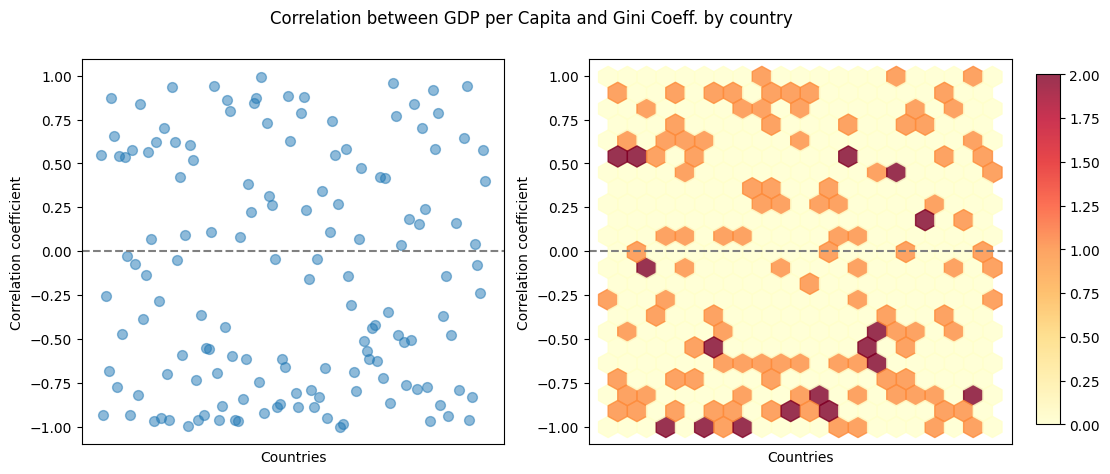

In [19]:
plot_correlation_heatmap(all, "Gini Coeff.", "GDP per Capita")

**Both plots show the same data: the correlation between GDP per capita and Gini coefficient for each country.**

* The scatterplot shows a dot for each country. 

* the heatmap allows for a more visual representation of the concentration of values.

(to be fair: I just wanted to see how you make a heatmap 😉)



---








**It looks like there is a higher concentration of data points around the line of negative correlation (-1)**

That means that there could be a negative correlation: when the GDP per capita rises, the Gini coefficient falls.

Meaning that when the average income rises, income inequality decreases.








# The world

Now let's look at the world as a whole. I have taken the data for years 1990-2021 as they had the most data for all aspects I will be looking at.

In [20]:
describe_correlation(world, "GDP per Capita", "Gini Coeff.")

The Pearson correlation coefficient of GDP per Capita and Gini Coeff. is a high negative correlation.
The P-value of GDP per Capita and Gini Coeff. is significant.


Not really a surprise, looking at what we saw above for all countries combined.

How did the GDP per capita and Gini coefficient do over time?

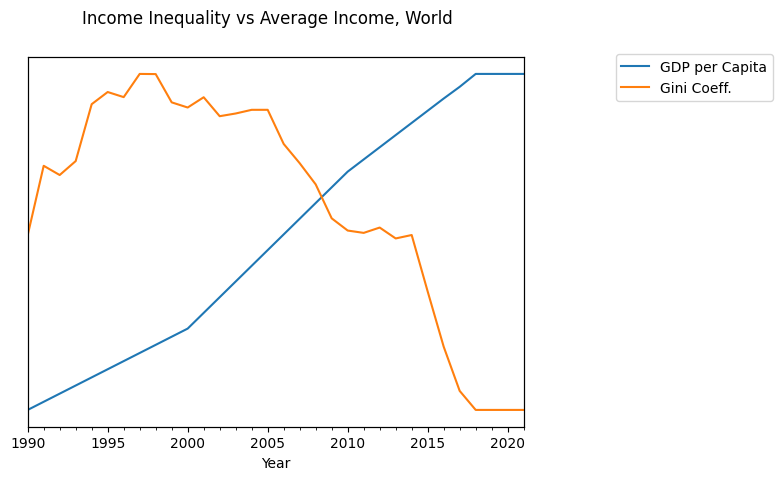

In [21]:
multi_lines(world, ["GDP per Capita", "Gini Coeff."], "Income Inequality vs Average Income, World")

Still no surprises there but still interesting to see it visualized like this!

# Conclusion: 
**There seems to be a strong negative correlation between GDP per capita and income inequality but it is impossible to prove causation**

# Extra's 

I am curious about other factors that are thought of to have a correlation with GDP per capita. Do they also have a correlation with income inequality?

# Human development Index vs GDP per Capita and Income inequality

The Human Development Index (HDI) is an index that measures key dimensions of human development. The three key dimensions are:

* A long and healthy life – measured by life expectancy.

* Access to education – measured by expected years of schooling of children at school-entry age and mean years of schooling of the adult population.

* And a decent standard of living – measured by Gross National Income per capita adjusted for the price level of the country.

source: [Human development index on Our world in data.](https://ourworldindata.org/human-development-index)

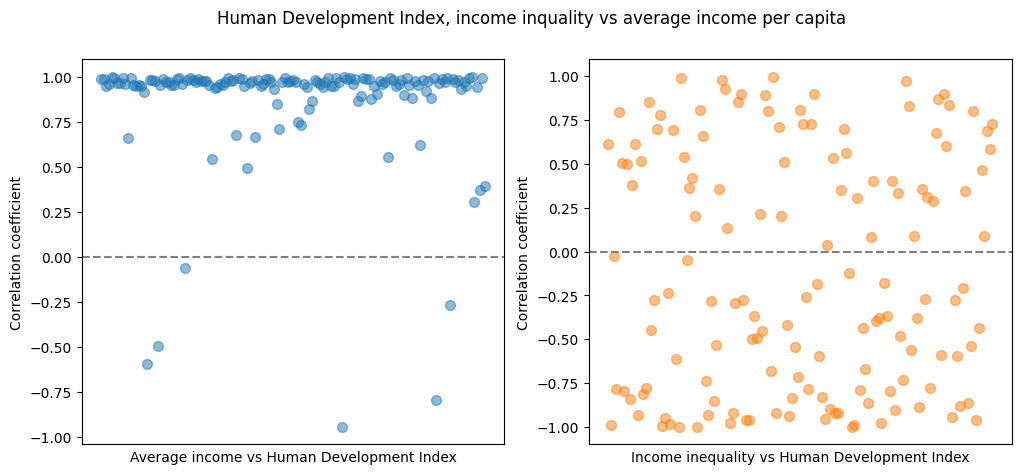

In [22]:
# Human Development Index vs Gini and GDP
column_vs_both(all, "Human Development Index")

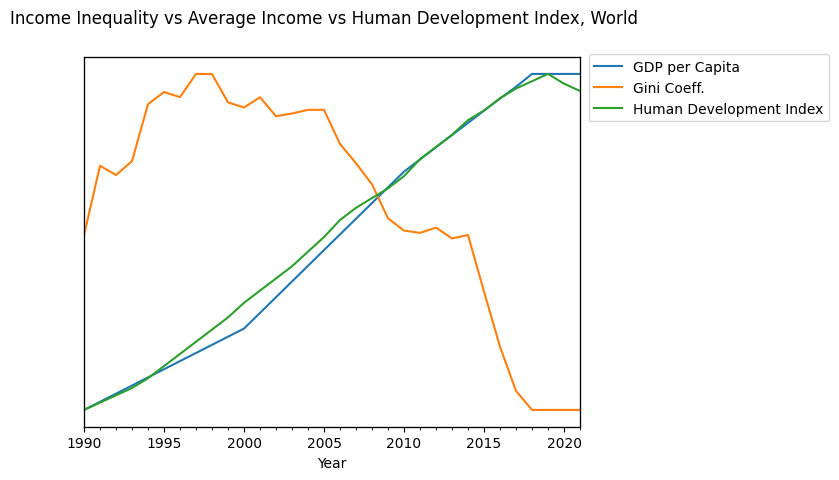

In [23]:
multi_lines(world, ["GDP per Capita", "Gini Coeff.", "Human Development Index"], "Income Inequality vs Average Income vs Human Development Index, World")

The plots above show a very strong correlation between the HDI and GDP per capita.

That comes as no surprise since the average income is one of the three dimensions measured by the HDI and the other three (good education and good health) are probably correlated with GDP per capita as well.

The correlation between the HDI and and the Gini coefficient seems to show a negative correlation.

It looks like there is a higher concentration of data points around the line of negative correlation (-1)

That could mean: 

* **When the average income rises, the development index rises and inequality decreases.**


# Urbanization vs Income inequality

Urbanization measures the pecentage of the total population that lives in an urban environment vs a rural environment. 

The correlation between the GDP per capita and urbanization is well known: 
When the average income rizes countries tend to become more urbanized.

However, since the cost of living in urban areas can be much higher than in rural areas it would not necessarily mean that the quality of life or the Human development index would also rise.
Afterall, some countries with the largest cities also have the larges slums, where people are extremely poor.

source: [Urbanization on Our world in data.](https://ourworldindata.org/urbanization)

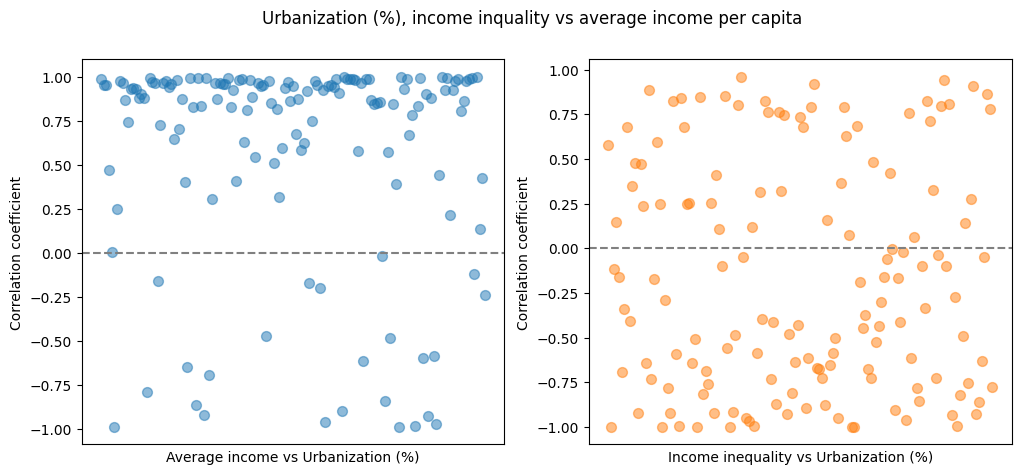

In [24]:
# Urbanization vs Gini and GDP
column_vs_both(all, "Urbanization (%)")

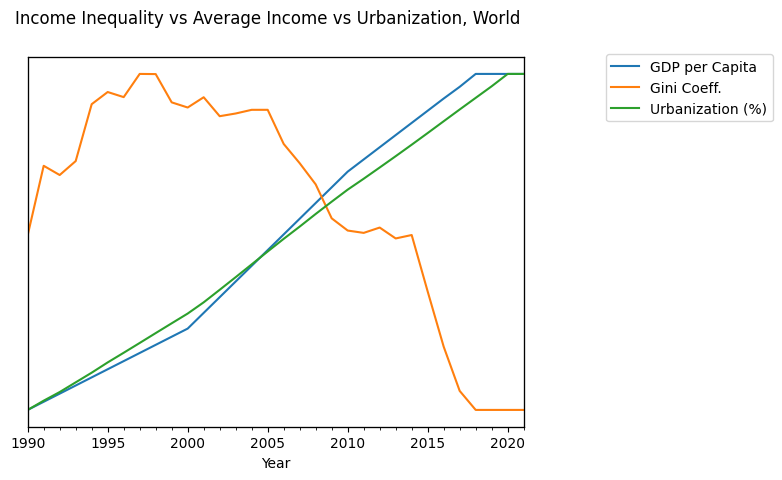

In [25]:
multi_lines(world, ["GDP per Capita", "Gini Coeff.", "Urbanization (%)"], "Income Inequality vs Average Income vs Urbanization, World")


We must recognise that this is a tricky measurement to look at because, even more than with the other measurements, it is almost impossible to see any form of causation, let alone distinguish how that causation could be formed. What is the chicken and what the egg? Is the GDP per capita rising because of urbanization or is urbanization happening because of the rizing average income?

As predicted the plots show a positive correlation between GDP per capita and urbanization.
* **As countries become more urbanized, the average income rises.**

Correlation between urbanization and income inequality is not that clear. I can see more concentration in the bottom half but compared to the other measurements there it is more spread out over the entire half instead of around the -1 line.
* **As countries become more urbanized, inequality tends to fall.**


# Population growth vs Income inequality

I found this one, just like urbanization, not that straightforward. 
On one hand: a growing population could mean more working hands, more potential income for a country. But on the other hand it also means more mouths to feed.
We also see a tendency for people in poorer areas to have more children so a bigger population does not automatically mean a higher GDP.

All in all it depends a lot on the overall state of the country and the balance is more fragile then with other factors.

source: ["Population growth on Our world in data."](https://ourworldindata.org/world-population-growth)

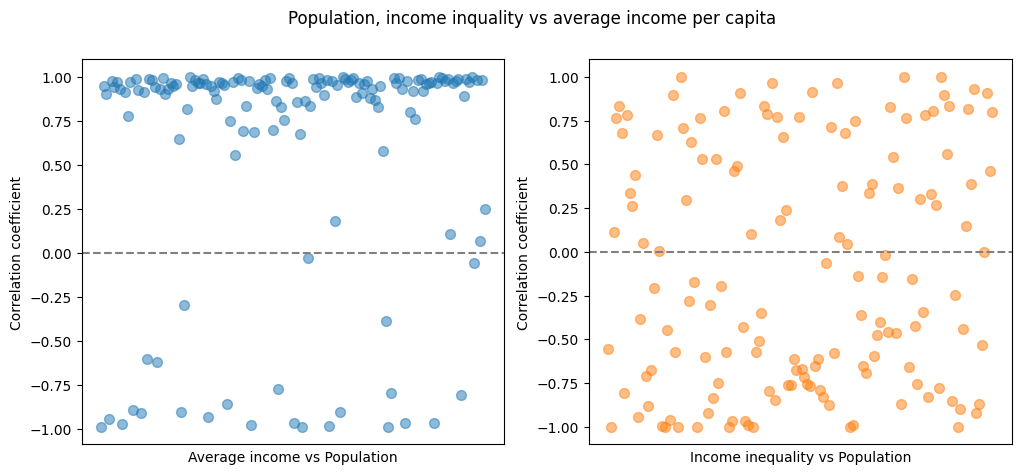

In [26]:
# Population growth vs Gini and GDP
column_vs_both(all, "Population")

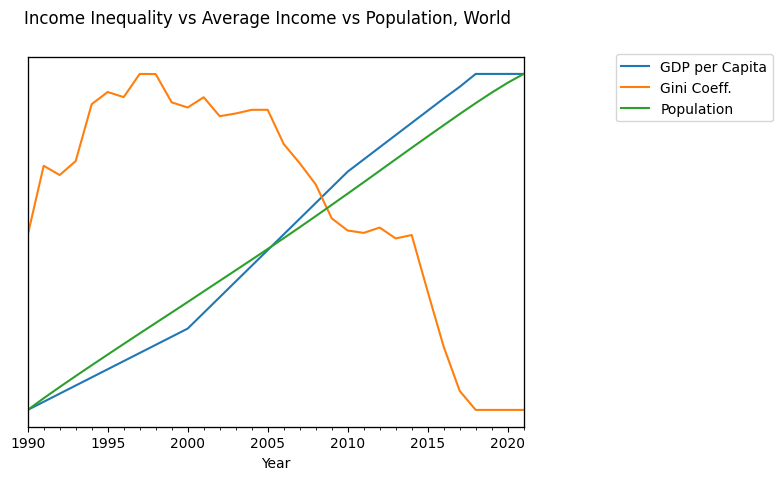

In [27]:
multi_lines(world, ["GDP per Capita", "Gini Coeff.", "Population"], "Income Inequality vs Average Income vs Population, World")

When looking at the correlation coefficient for GDP and Gini index for all countries over the years we do see a strong positive correlation between the population growth and the average income.


*   **When the population grows, the average income tends to grow as well.**

However, just like with urbanization, I think this is a good example of how correlation doesn't automatically mean causation.
The population in most countries could have grown over time because of a general better life expectancy, for example. Just as the GDP grew over time because of other factors. Those are not necessarily related, they could simply be happening at the same time. 


I find the relationship between income inequality and population growth interesting as well. There seems to be concentration around the -1 line which could indicate that
* **When the population grows, inequality tends to falls**



# End conclusion

I had fun looking at the different aspects from different sides. It made it all the more clear that correlation does not equal causation and that economy is a complex matter.

So to end with an answer to the original question of the assignment: 
* **Yes, there seems to be a correlation between GDP per capita and income inequality in the sense that when one rises the other falls. But no, there is no way for me to show any causality.**